<a href="https://colab.research.google.com/github/jeremysb1/scikit_learn_fundamentals/blob/main/working_with_scikit_learn_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import dataset
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [2]:
# standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline



In [3]:
housing_df = pd.DataFrame(housing["data"], columns=housing["feature_names"])
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [6]:
housing_df["MedHouseVal"] = housing["target"]
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,3.422


In [7]:
housing_df = housing_df.drop("MedHouseVal", axis=1)
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [8]:
# import algorithm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge

# setup random seed
np.random.seed(42)

# create data
X = housing_df.drop("target", axis=1)
y = housing_df["target"] # median house price in $100,000s

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate and fit the model
model = Ridge()
model.fit(X_train, y_train)

# Check model score on the test set
model.score(X_test, y_test)

0.5758549611440126

In [9]:
# trying an ensemble model
from sklearn.ensemble import RandomForestRegressor

# setup randoom seed
np.random.seed(42)

# create the data
X = housing_df.drop("target", axis=1)
y = housing_df["target"] # median house price in $100,000s

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# instantiate and fit model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# check model score on the test set
model.score(X_test, y_test)

0.8066196804802649

In [10]:
# classification problem
heart_disease = pd.read_csv("https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/data/heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [11]:
# trying linearsvc algorithm
from sklearn.svm import LinearSVC

# setup random seed
np.random.seed(42)

# data prep
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# split the data
X_test, X_train, y_test, y_train = train_test_split(X, y, test_size=0.2)

# instantiate linearsvc and fit the model
clf = LinearSVC(max_iter=10000)
clf.fit(X_train, y_train)

# evaluate LinearSVC
clf.score(X_test, y_test)

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.71900826446281

In [12]:
# trying RandomForestClassifier algorithm
from sklearn.ensemble import RandomForestClassifier

# setup random seed
np.random.seed(42)

# data prep
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# split the data
X_test, X_train, y_test, y_train = train_test_split(X, y, test_size=0.2)

# instantiate model and fit the model
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)

# evaluate model
clf.score(X_test, y_test)

0.7892561983471075

In [13]:
# fit the model to the data
# trying RandomForestClassifier algorithm
from sklearn.ensemble import RandomForestClassifier

# setup random seed
np.random.seed(42)

# data prep
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# split the data
X_test, X_train, y_test, y_train = train_test_split(X, y, test_size=0.2)

# instantiate model
clf = RandomForestClassifier(n_estimators=100)

# fit the model to the data
clf.fit(X_train, y_train)

# evaluate model
clf.score(X_test, y_test)

0.7892561983471075

In [14]:
# make predictions with a trained model
clf.predict(X_test)

array([1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1])

In [15]:
np.array(y_test)

array([1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1])

In [16]:
y_preds = clf.predict(X_test)
np.mean(y_preds == y_test)

0.7892561983471075

In [17]:
clf.score(X_test, y_test)

0.7892561983471075

In [18]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds)

0.7892561983471075

In [19]:
clf.predict_proba(X_test[:5])

array([[0.07, 0.93],
       [0.81, 0.19],
       [0.21, 0.79],
       [0.19, 0.81],
       [0.7 , 0.3 ]])

In [20]:
clf.predict(X_test[:5])

array([1, 0, 1, 1, 0])

In [21]:
X_test[:5]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3


In [22]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [23]:
from sklearn.ensemble import RandomForestRegressor

# random seed
np.random.seed(42)

# create the data
X = housing_df.drop("target", axis=1)
y = housing_df["target"]

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# create model instance
model = RandomForestRegressor()

# fit model to data
model.fit(X_train, y_train)

# make predictions
y_pred = model.predict(X_test)

In [24]:
y_pred[:10]

array([0.49384  , 0.75494  , 4.9285964, 2.54029  , 2.33176  , 1.6549701,
       2.34323  , 1.66182  , 2.47489  , 4.8344779])

In [25]:
np.array(y_test[:10])

array([0.477  , 0.458  , 5.00001, 2.186  , 2.78   , 1.587  , 1.982  ,
       1.575  , 3.4    , 4.466  ])

In [26]:
# compare prediction to the truth
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

0.3265721842781009

In [27]:
housing_df["target"]

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: target, Length: 20640, dtype: float64

In [28]:
from sklearn.ensemble import RandomForestClassifier

# random seed
np.random.seed(42)

# Create data

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# create classifier model instance
clf = RandomForestClassifier(n_estimators=100)

# fit classifier to training data
clf.fit(X_train, y_train)

RandomForestClassifier()

In [29]:
clf.score(X_test, y_test)

0.8524590163934426

In [30]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor(n_estimators=100)

model.fit(X_train, y_train)

RandomForestRegressor()

In [31]:
model.score(X_test, y_test)

0.5106393318965518

In [32]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
clf = RandomForestClassifier()

clf.fit(X_train, y_train)

RandomForestClassifier()

In [33]:
clf.score(X_test, y_test)

0.8524590163934426

In [34]:
cross_val_score(clf, X, y)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [35]:
np.random.seed(42)

clf_single_score = clf.score(X_test, y_test)

clf_cross_val_score = np.mean(cross_val_score(clf, X, y))

clf_single_score, clf_cross_val_score

(0.8524590163934426, 0.8248087431693989)

In [36]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

clf = RandomForestClassifier()
cross_val_score = cross_val_score(clf, X, y, cv=5)

In [37]:
np.mean(cross_val_score)

0.8248087431693989

In [38]:
 # create X_test... etc

 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [39]:
from sklearn.metrics import roc_curve

# fit the classifier
clf.fit(X_train, y_train)

# make predictions with probabilities
y_probs = clf.predict_proba(X_test)
y_probs[:10]

array([[0.51, 0.49],
       [0.17, 0.83],
       [0.51, 0.49],
       [0.72, 0.28],
       [0.43, 0.57],
       [0.12, 0.88],
       [0.3 , 0.7 ],
       [0.97, 0.03],
       [0.15, 0.85],
       [0.4 , 0.6 ]])

In [40]:
y_probs_positive = y_probs[:, 1]
y_probs_positive[:10]

array([0.49, 0.83, 0.49, 0.28, 0.57, 0.88, 0.7 , 0.03, 0.85, 0.6 ])

In [41]:
# calculate fpr, tpr, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

# check false positive rates
fpr

array([0.        , 0.03448276, 0.03448276, 0.03448276, 0.03448276,
       0.03448276, 0.03448276, 0.06896552, 0.06896552, 0.06896552,
       0.10344828, 0.10344828, 0.13793103, 0.13793103, 0.13793103,
       0.20689655, 0.20689655, 0.20689655, 0.27586207, 0.37931034,
       0.37931034, 0.48275862, 0.48275862, 0.55172414, 0.55172414,
       1.        ])

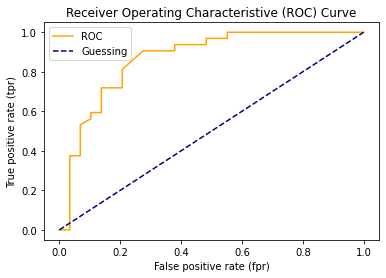

In [42]:
# create a function for plotting ROC curves
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
  """
  Plots a ROC curve given the false positive rate 
  and true positive rate.
  """
  # plot roc curve
  plt.plot(fpr, tpr, color="orange", label="ROC")
  
  # plot line with no predictive power (baseline)
  plt.plot([0, 1], [0, 1], color="darkblue", linestyle="--", label="Guessing")

  # customize the plot
  plt.xlabel("False positive rate (fpr)")
  plt.ylabel("True positive rate (tpr)")
  plt.title("Receiver Operating Characteristive (ROC) Curve")
  plt.legend()
  plt.show()

plot_roc_curve(fpr, tpr)

In [43]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_positive)

0.8669181034482759

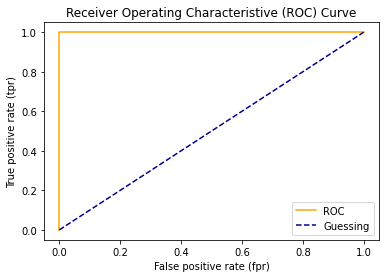

In [44]:
# plot perfect ROC score and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_test)
plot_roc_curve(fpr, tpr)

In [45]:
# perfect AUC score
roc_auc_score(y_test, y_test)

1.0

Confusion Matrix

In [46]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)

confusion_matrix(y_test, y_preds)

array([[23,  6],
       [ 6, 26]])

In [47]:
# visualize confusion matrix with pd crosstab
pd.crosstab(y_test,
            y_preds,
            rownames=["Actual Labels"],
            colnames=["Predicted Labels"])

Predicted Labels,0,1
Actual Labels,,
0,23,6
1,6,26


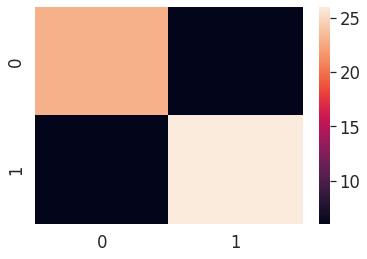

In [48]:
# visualize a confusion matrix with seaborn heat map
import seaborn as sns

sns.set(font_scale=1.5)

conf_mat = confusion_matrix(y_test, y_preds)

sns.heatmap(conf_mat)